Logistic regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
credit_card_data = pd.read_csv('/creditcard.csv')

In [ ]:
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
136755,81853,1.256653,0.138079,0.069747,0.094839,-0.352195,-1.308192,0.353293,-0.326797,-0.081518,...,-0.429359,-1.338348,0.188336,0.409202,0.094498,0.619344,-0.104868,0.007905,30.00,0.0
136756,81854,-1.699593,0.489149,1.773972,-0.971018,-0.151486,0.312121,-0.103458,0.639556,0.067432,...,-0.059988,0.050979,0.174601,-0.558490,0.342547,0.974904,0.066504,-0.009390,42.73,0.0
136757,81854,1.143457,-0.276825,-0.797496,0.161368,0.581342,0.588723,0.088451,0.176529,0.042890,...,-0.060396,-0.434133,-0.311813,-1.724827,0.596453,0.484119,-0.071482,-0.013778,94.52,0.0
136758,81854,-1.688997,-1.386457,1.693221,-1.661677,1.446440,-1.165621,-0.765092,0.203625,-1.624071,...,0.053593,-0.609801,0.087430,-0.568976,0.396632,-0.555568,-0.044765,0.078299,30.65,0.0
136759,81854,-0.646568,1.238071,1.292985,0.039589,0.004259,-0.722208,0.627479,0.060116,-0.213992,...,-0.248502,-0.542887,0.087104,0.341782,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136760 entries, 0 to 136759
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    136760 non-null  int64  
 1   V1      136760 non-null  float64
 2   V2      136760 non-null  float64
 3   V3      136760 non-null  float64
 4   V4      136760 non-null  float64
 5   V5      136760 non-null  float64
 6   V6      136760 non-null  float64
 7   V7      136760 non-null  float64
 8   V8      136760 non-null  float64
 9   V9      136760 non-null  float64
 10  V10     136760 non-null  float64
 11  V11     136760 non-null  float64
 12  V12     136760 non-null  float64
 13  V13     136760 non-null  float64
 14  V14     136760 non-null  float64
 15  V15     136760 non-null  float64
 16  V16     136760 non-null  float64
 17  V17     136760 non-null  float64
 18  V18     136760 non-null  float64
 19  V19     136760 non-null  float64
 20  V20     136760 non-null  float64
 21  V21     13

In [ ]:
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
credit_card_data['Class'].value_counts()  #showing the fraud transactions and legit transactions

,count
Class,
0.0,136496
1.0,263


In [ ]:
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]


In [ ]:
print(legit)
print(fraud)

         Time        V1        V2        V3        V4        V5        V6  \
0           0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1           0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2           1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3           1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4           2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...       ...       ...       ...       ...       ...       ...       ...   
136754  81853  1.301798 -1.170032 -0.244466 -1.515675 -0.870002 -0.295976   
136755  81853  1.256653  0.138079  0.069747  0.094839 -0.352195 -1.308192   
136756  81854 -1.699593  0.489149  1.773972 -0.971018 -0.151486  0.312121   
136757  81854  1.143457 -0.276825 -0.797496  0.161368  0.581342  0.588723   
136758  81854 -1.688997 -1.386457  1.693221 -1.661677  1.446440 -1.165621   

              V7        V8        V9  ...       V21       V22       V23  \


In [ ]:
print(legit.shape)
print(fraud.shape)

(136496, 31)
(263, 31)


In [ ]:
legit.Amount.describe()

,Amount
count,136496.000000
mean,91.544902
std,248.401229
min,0.000000
25%,6.060000
50%,24.000000
75%,81.452500
max,19656.530000


In [ ]:
fraud.Amount.describe()

,Amount
count,263.000000
mean,115.821939
std,245.555287
min,0.000000
25%,1.000000
50%,9.990000
75%,99.990000
max,1809.680000


In [ ]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,51145.715574,-0.235760,0.003112,0.689819,0.132225,-0.277110,0.079923,-0.105501,0.061613,-0.084749,...,0.041534,-0.041079,-0.117125,-0.033829,0.012183,0.130407,0.023135,-0.000213,0.002125,91.544902
1.0,42268.619772,-5.626583,3.954001,-7.166881,4.518643,-3.992721,-1.483299,-5.954429,1.511967,-2.609642,...,0.240625,1.261098,-0.311839,-0.116866,-0.106327,0.198141,0.057140,0.491224,0.082252,115.821939


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
60786,49503,-3.839169,0.018774,-2.176319,0.516127,-0.694220,-2.047297,-0.482932,1.355069,-0.274843,...,-0.307854,-0.416216,0.778392,0.278712,0.129487,0.406920,0.281019,-1.246802,17.10,0.0
124502,77316,1.166689,0.340896,0.832763,2.413044,-0.329706,-0.032482,-0.254913,0.051713,-0.333830,...,0.111563,0.250808,-0.127368,-0.129852,0.476963,0.128511,0.005516,0.026339,21.19,0.0
7514,10262,-1.161678,1.014845,1.341105,0.219589,-0.399681,-0.792609,0.060908,0.450452,0.744772,...,-0.290013,-0.735224,0.328666,0.410629,-0.247836,0.007369,0.006379,0.007010,19.98,0.0
40542,40285,0.758244,-0.403836,-0.055171,1.306383,0.030989,0.452411,0.260819,0.171878,-0.152502,...,0.176561,0.265512,-0.252874,-0.276621,0.576206,-0.236324,0.000753,0.027224,185.04,0.0
42168,40978,-0.675169,1.383807,0.542348,0.948633,-0.363193,-0.856115,0.365628,0.233094,-0.403687,...,0.138380,0.391091,0.018021,0.381528,-0.083928,-0.330524,-0.043626,0.019685,18.90,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
124176,77202,-0.356326,1.435305,-0.813564,1.993117,2.055878,-0.543579,0.487691,0.085449,-0.536352,...,-0.312863,-0.687874,-0.267003,-1.158480,0.271460,-0.155397,0.114328,0.101526,1.00,1.0
125342,77627,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,...,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,106.90,1.0
128479,78725,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,0.290273,...,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,60.00,1.0
131272,79540,-0.114361,1.036129,1.984405,3.128243,-0.740344,1.548619,-1.701284,-2.203842,-1.242265,...,-1.032935,1.196428,-0.112857,0.254719,0.696668,0.482370,0.129969,0.223924,0.20,1.0
135718,81372,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,7.57,1.0


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,263


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,50921.071138,-0.184250,-0.052099,0.715173,0.150625,-0.301275,0.065502,-0.083988,0.086402,-0.003560,...,0.002716,-0.038737,-0.114744,-0.005039,0.016395,0.157414,0.030407,0.009010,-0.003515,90.256260
1.0,42268.619772,-5.626583,3.954001,-7.166881,4.518643,-3.992721,-1.483299,-5.954429,1.511967,-2.609642,...,0.240625,1.261098,-0.311839,-0.116866,-0.106327,0.198141,0.057140,0.491224,0.082252,115.821939


In [ ]:
X =new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [ ]:
print(X)

         Time        V1        V2        V3        V4        V5        V6  \
60786   49503 -3.839169  0.018774 -2.176319  0.516127 -0.694220 -2.047297   
124502  77316  1.166689  0.340896  0.832763  2.413044 -0.329706 -0.032482   
7514    10262 -1.161678  1.014845  1.341105  0.219589 -0.399681 -0.792609   
40542   40285  0.758244 -0.403836 -0.055171  1.306383  0.030989  0.452411   
42168   40978 -0.675169  1.383807  0.542348  0.948633 -0.363193 -0.856115   
...       ...       ...       ...       ...       ...       ...       ...   
124176  77202 -0.356326  1.435305 -0.813564  1.993117  2.055878 -0.543579   
125342  77627 -7.139060  2.773082 -6.757845  4.446456 -5.464428 -1.713401   
128479  78725 -4.312479  1.886476 -2.338634 -0.475243 -1.185444 -2.112079   
131272  79540 -0.114361  1.036129  1.984405  3.128243 -0.740344  1.548619   
135718  81372 -0.885254  1.790649 -0.945149  3.853433 -1.543510  0.188582   

              V7        V8        V9  ...       V20       V21       V22  \


In [ ]:
print(Y)

60786     0.0
124502    0.0
7514      0.0
40542     0.0
42168     0.0
         ... 
124176    1.0
125342    1.0
128479    1.0
131272    1.0
135718    1.0
Name: Class, Length: 755, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(755, 30) (604, 30) (151, 30)


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction=model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 0.9619205298013245


In [ ]:
X_test_prediction=model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy on Test data:',test_data_accuracy)

Accuracy on Test data: 0.9602649006622517


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
X_test_prediction = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Extract True Negatives, False Positives, False Negatives, True Positives
tn, fp, fn, tp = cm.ravel()  # True Negatives, False Positives, False Negatives, True Positives

# Calculate metrics
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate
precision = tp / (tp + fp)    # Positive Predictive Value
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

# Display the results
print("Confusion Matrix:\n", cm)
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

# Alternatively, you can use classification_report for a summary
print("\nClassification Report:\n", classification_report(Y_test, X_test_prediction))


Confusion Matrix:
 [[97  1]
 [ 5 48]]
Sensitivity (Recall): 0.91
Specificity: 0.99
Precision: 0.98
F1 Score: 0.94

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        98
         1.0       0.98      0.91      0.94        53

    accuracy                           0.96       151
   macro avg       0.97      0.95      0.96       151
weighted avg       0.96      0.96      0.96       151



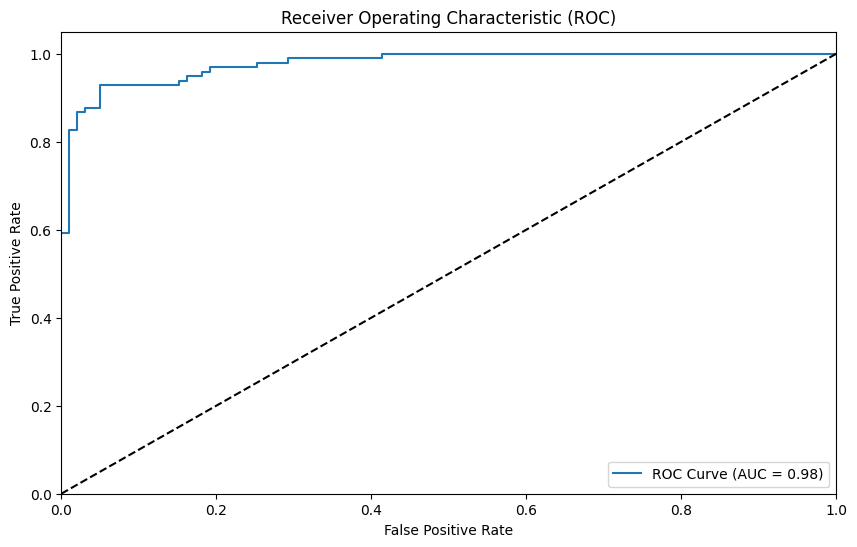

AUC: 0.98


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already defined X_test, Y_test, and trained your model

# Predict probabilities for the test set
Y_test_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
auc = roc_auc_score(Y_test, Y_test_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {auc:.2f}')



# **SVM**

In [ ]:
import pandas as pd
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/creditcard.csv') # Reading the file .csv
df = pd.DataFrame(data) # Converting data to Panda DataFrame

In [ ]:
df = pd.DataFrame(data) # Converting data to Panda DataFrame

In [ ]:
df.describe() # Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,267012.000000,267012.000000,267012.000000,267012.000000,267012.000000,267012.000000,267012.000000,267012.000000,267012.000000,267012.000000,...,267011.000000,267011.000000,267011.000000,267011.000000,267011.000000,267011.000000,267011.000000,267011.000000,267011.000000,267011.000000
mean,89997.097632,-0.013335,-0.014371,0.048225,0.010651,-0.019265,0.008337,-0.008467,0.000074,-0.000179,...,-0.000108,-0.004846,-0.002481,0.001368,0.009936,0.001099,-0.000445,0.000797,89.651599,0.001798
std,45094.699125,1.959262,1.659172,1.510316,1.416431,1.369593,1.325379,1.221839,1.193243,1.105156,...,0.737986,0.721847,0.631671,0.605963,0.518190,0.483452,0.399985,0.333238,248.425215,0.042361
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,52207.750000,-0.925493,-0.607494,-0.811181,-0.845988,-0.710846,-0.759908,-0.559993,-0.206119,-0.650170,...,-0.226441,-0.537895,-0.163235,-0.351761,-0.305098,-0.328101,-0.070770,-0.051793,5.990000,0.000000
50%,80418.500000,0.015364,0.059820,0.240705,-0.002927,-0.076170,-0.262445,0.029577,0.024789,-0.054477,...,-0.029846,0.004008,-0.014400,0.043625,0.033810,-0.055252,0.001630,0.012495,22.720000,0.000000
75%,133359.000000,1.291864,0.788080,1.063960,0.768714,0.588631,0.410341,0.558402,0.327904,0.601919,...,0.182209,0.514614,0.142146,0.436787,0.357380,0.244151,0.089518,0.077891,79.000000,0.000000
max,162575.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


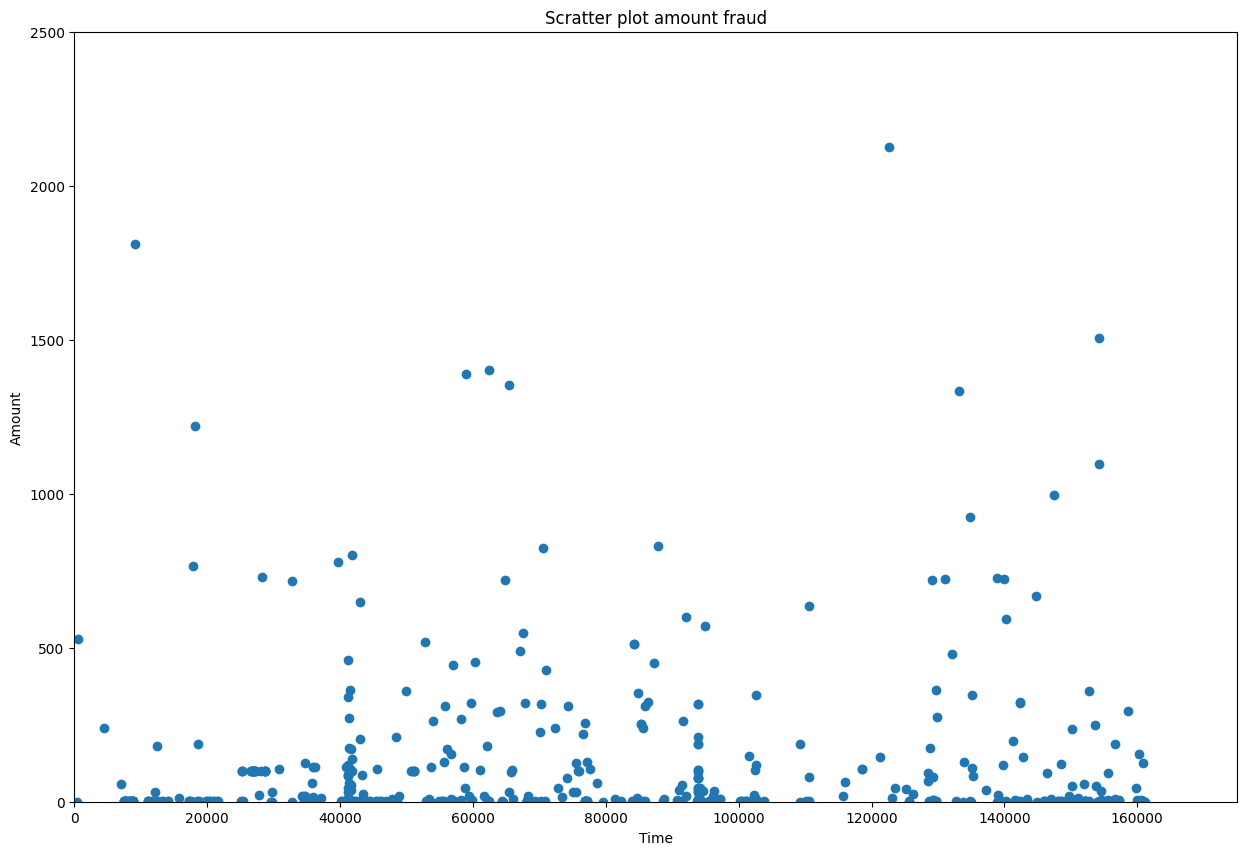

In [ ]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')


There are only 9 frauds where the amount was bigger than 1000 over 480 frauds


In [ ]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 480 frauds in the original dataset, even though there are 266531 no frauds in the dataset.


In [ ]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


In [ ]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

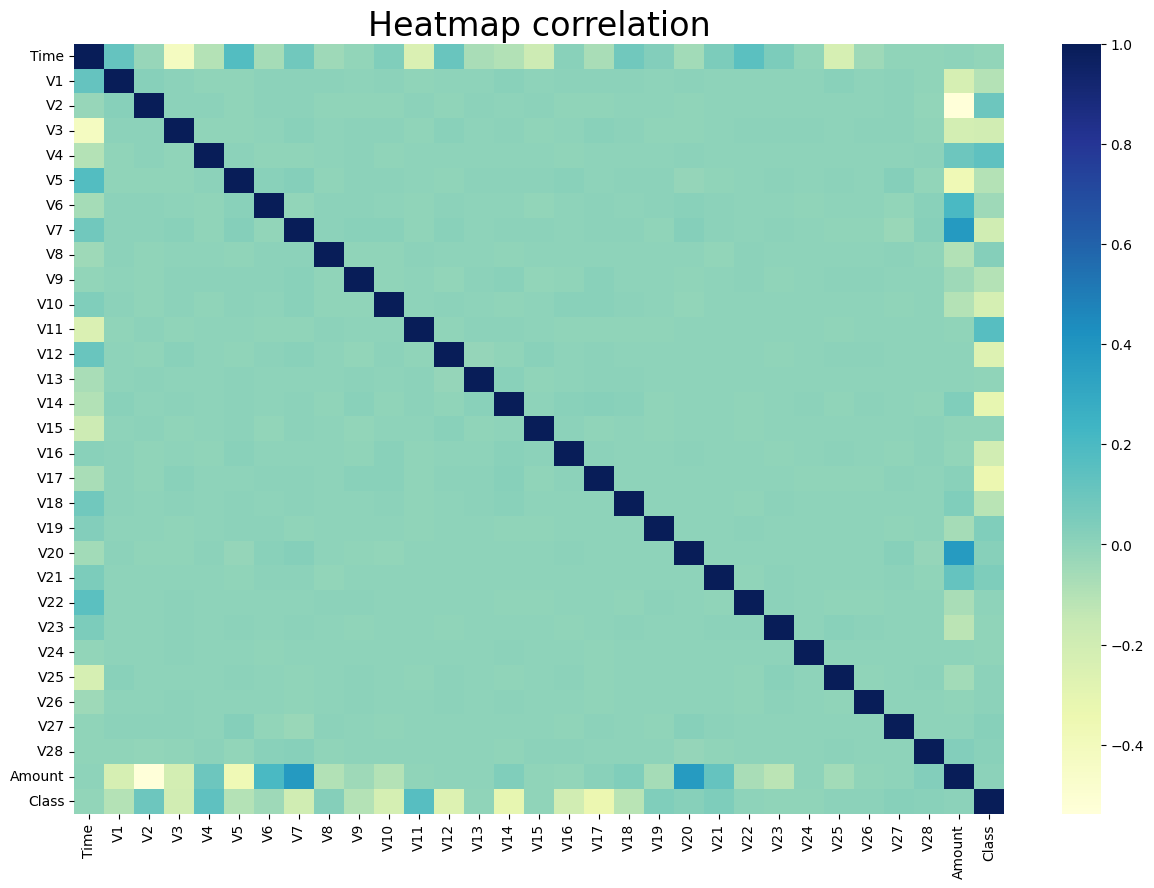

In [ ]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank)
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)


In [ ]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
# Use pd.concat instead of append
df_train = pd.concat([df_train_1, df_sample]) # We gather the frauds with the no frauds.
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [ ]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
############################## with all the test dataset to see if the model learn correctly ##################
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [ ]:
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)

In [ ]:
############################## with all the test dataset to see if the model learn correctly ##################
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

CONFUSION MATRIX

In [ ]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)


In [ ]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model Selection

So now, we'll use a SVM model classifier, with the scikit-learn library.

In [ ]:
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [ ]:
classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(kernel='linear')

Testing the model

In [ ]:
!pip install scikit-learn

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Assuming X_test_all is a pandas DataFrame or a NumPy array
# If it's a NumPy array, convert it to a DataFrame first:
# X_test_all = pd.DataFrame(X_test_all)

# Create a SimpleImputer instance with the desired strategy (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed

# Fit the imputer on your training data (X_train) to learn the imputation values
imputer.fit(X_train)  # Assuming you have X_train available

# Transform X_test_all to replace NaN values with imputed values
X_test_all_imputed = imputer.transform(X_test_all)

# Now you can use the imputed data for prediction:
prediction_SVM_all = classifier.predict(X_test_all_imputed)

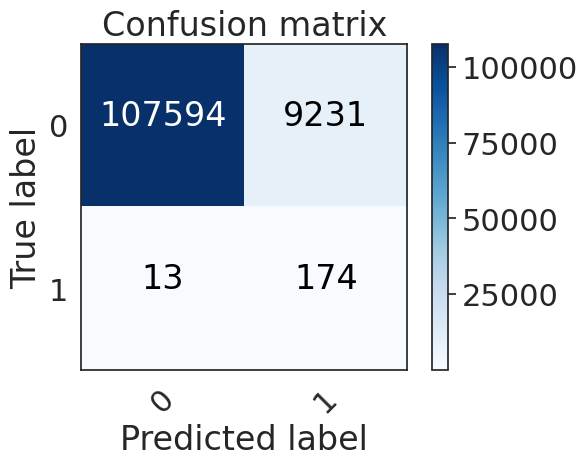

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

# Assuming y_test_all is a pandas Series or a NumPy array
# If it's a NumPy array, convert it to a Series first:
# y_test_all = pd.Series(y_test_all)

# Create a SimpleImputer instance with a strategy to handle NaN values
# For classification, using 'most_frequent' is often appropriate
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on y_test_all and transform it to replace NaNs
y_test_all_imputed = imputer.fit_transform(y_test_all.reshape(-1, 1))

# Reshape the imputed data back to a 1D array if necessary
y_test_all_imputed = y_test_all_imputed.ravel()

# Now you can use the imputed data for the confusion matrix:
cm = confusion_matrix(y_test_all_imputed, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In this case we are gonna try to minimize the number of errors in our prediction results. Errors are on the anti-diagonal of the confusion matrix. But we can infer that being wrong about an actual fraud is far worse than being wrong about a non-fraud transaction.

That is why using the accuracy as only classification criterion could be considered unthoughtful. During the remaining part of this study our criterion will consider precision on the real fraud 4 times more important than the general accuracy. Even though the final tested result is accuracy.

In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9285849378581948


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 174 frauds / 187 total frauds.

So, the probability to detect a fraud is 0.93048128342246
the accuracy is : 0.9209995556011349


Models Rank

There is a need to compute the fit method again, as the dimension of the tuples to predict went from 29 to 10 because of the dimension reduction

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Assuming X_test_all_rank is your DataFrame with NaN values

# Create a SimpleImputer instance to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')  # You can use 'median' as well

# Fit the imputer to your data and transform it
X_test_all_rank_imputed = imputer.fit_transform(X_test_all_rank)

# Now use the imputed data for prediction
classifier = SVC(kernel='linear')  # or any other SVC configuration
classifier.fit(X_train_rank, y_train)
prediction_SVM = classifier.predict(X_test_all_rank_imputed)

In [ ]:
import pandas as pd

# Assuming X_test_all_rank is your DataFrame with NaN values

# Drop rows with any NaN values
X_test_all_rank_cleaned = X_test_all_rank[~pd.isnull(X_test_all_rank).any(axis=1)]

# Now use the cleaned data for prediction
prediction_SVM = classifier.predict(X_test_all_rank_cleaned)

In [ ]:
cm = confusion_matrix(y_test_all[:len(prediction_SVM)], prediction_SVM)

In [ ]:
     import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming X_test_all_rank is your DataFrame with NaN values
# and y_test_all are your target values

# Create a boolean mask indicating rows with NaN in X_test_all_rank
nan_rows = np.isnan(X_test_all_rank).any(axis=1)

# Remove corresponding targets
y_test_all_filtered = y_test_all[~nan_rows]

# Now you can calculate the confusion matrix
cm = confusion_matrix(y_test_all_filtered, prediction_SVM)
nan_rows = np.isnan(X_test_all_rank).any(axis=1)

In [ ]:
cm

array([[108190,   8634],
       [    13,    174]])

In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9296052197112783


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 174 frauds / 187 total frauds.

So, the probability to detect a fraud is 0.93048128342246
the accuracy is : 0.926100964866551


Re-balanced class weigh

In [ ]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [ ]:
classifier_b.fit(X_train, y_train) # Then we train our model, with our balanced data train.


SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

Testing the model

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Assuming X_train and y_train are already defined

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data (X_train) and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Create and train your SVM model using the imputed training data
classifier_b = SVC(kernel='linear', class_weight={0: 0.60, 1: 0.40})
classifier_b.fit(X_train_imputed, y_train)

# Impute the missing values in X_test_all using the trained imputer
X_test_all_imputed = imputer.transform(X_test_all)

# Now you can make predictions using the imputed test data
prediction_SVM_b_all = classifier_b.predict(X_test_all_imputed)

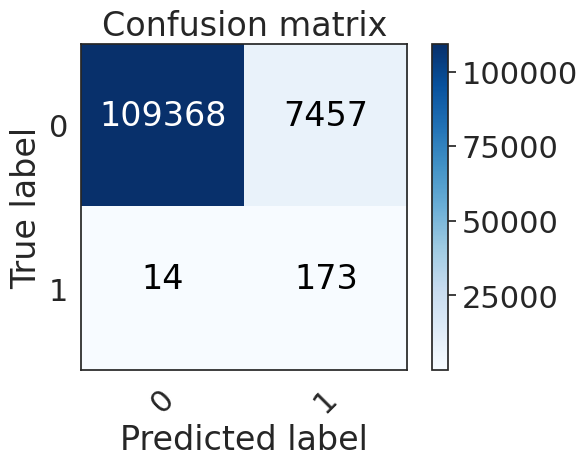

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
# Assuming X_train, y_train, X_test_all, y_test_all, and class_names are already defined

# Create an imputer to replace NaN with the most frequent value for the target variable
imputer_y = SimpleImputer(strategy='most_frequent')

# Fit the imputer on your target training data (y_train) and transform it to ensure no NaNs if present.
# This is a precaution and may not be necessary if y_train is guaranteed to have no NaNs
y_train_imputed = imputer_y.fit_transform(y_train.reshape(-1, 1))
y_train_imputed = y_train_imputed.ravel() # Reshape back to original shape

# Fit the imputer on your target test data (y_test_all) and transform it
y_test_all_imputed = imputer_y.transform(y_test_all.reshape(-1, 1))
y_test_all_imputed = y_test_all_imputed.ravel()  # Reshape back to original shape


# Create an imputer to replace NaN with the mean of the column for features
imputer_X = SimpleImputer(strategy='mean')

# Fit the imputer on your training data (X_train) and transform it
X_train_imputed = imputer_X.fit_transform(X_train)

# Create and train your SVM model using the imputed training data
classifier_b = SVC(kernel='linear', class_weight={0: 0.60, 1: 0.40})
classifier_b.fit(X_train_imputed, y_train_imputed)

# Impute the missing values in X_test_all using the trained imputer
X_test_all_imputed = imputer_X.transform(X_test_all)

# Now you can make predictions using the imputed test data
prediction_SVM_b_all = classifier_b.predict(X_test_all_imputed)

# Calculate confusion matrix using imputed target data
cm = confusion_matrix(y_test_all_imputed, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9273373214064063


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 173 frauds / 187 total frauds.

So, the probability to detect a fraud is 0.9251336898395722
the accuracy is : 0.9361518476737428


Models Rank

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# ... (your existing code) ...

# Impute missing values in X_test_all_rank before prediction
imputer_X_rank = SimpleImputer(strategy='mean')  # Or choose another strategy
X_test_all_rank_imputed = imputer_X_rank.fit_transform(X_test_all_rank)

# Now make predictions using the imputed ranked test data
prediction_SVM = classifier_b.predict(X_test_all_rank_imputed)

# ... (rest of your code) ...

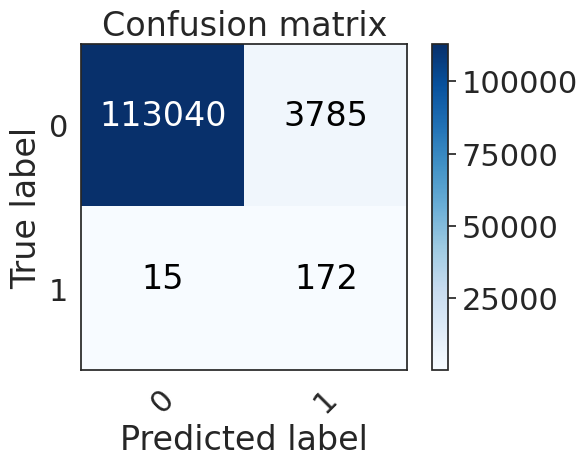

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# ... (your existing code) ...

# Impute missing values in X_test_all_rank before prediction
imputer_X_rank = SimpleImputer(strategy='mean')  # Or choose another strategy
X_test_all_rank_imputed = imputer_X_rank.fit_transform(X_test_all_rank)

# Impute missing values in y_test_all before calculating confusion matrix
imputer_y = SimpleImputer(strategy='most_frequent') # Use 'most_frequent' for classification targets
y_test_all_imputed = imputer_y.fit_transform(y_test_all.reshape(-1, 1)) # Reshape for SimpleImputer
y_test_all_imputed = y_test_all_imputed.ravel() # Flatten back to original shape

# Now make predictions using the imputed ranked test data
prediction_SVM = classifier_b.predict(X_test_all_rank_imputed)

# Calculate confusion matrix using imputed y_test_all
cm = confusion_matrix(y_test_all_imputed, prediction_SVM)
plot_confusion_matrix(cm,class_names)

# ... (rest of your code) ...

In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9293338166696555


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))


We have detected 172 frauds / 187 total frauds.

So, the probability to detect a fraud is 0.9197860962566845
the accuracy is : 0.9675246983215396


In [ ]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import numpy as np # Import numpy for nan_to_num

# Calculate metrics for the predictions
def calculate_metrics(y_true, y_pred):
    # Handle NaN values in y_true - replacing with 0
    y_true = np.nan_to_num(y_true)

    # Classification report
    report = classification_report(y_true, y_pred, target_names=class_names)
    print(report)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    # Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    # Precision
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

    # F1 Score
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    return sensitivity, specificity, precision, f1, fpr, tpr, auc

# For the first SVM model
sensitivity, specificity, precision, f1, fpr, tpr, auc = calculate_metrics(y_test_all, prediction_SVM_all)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC: {auc:.2f}')



              precision    recall  f1-score   support

           0       1.00      0.92      0.96    116825
           1       0.02      0.93      0.04       187

    accuracy                           0.92    117012
   macro avg       0.51      0.93      0.50    117012
weighted avg       1.00      0.92      0.96    117012

Sensitivity: 0.93
Specificity: 0.92
Precision: 0.02
F1 Score: 0.04
AUC: 0.93


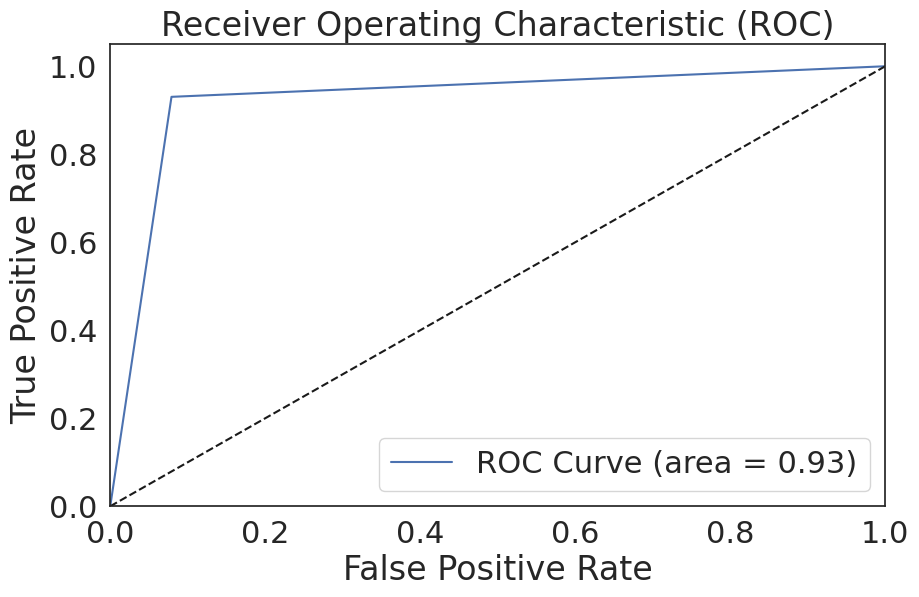

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Repeat for the ranked features SVM model
sensitivity, specificity, precision, f1, fpr, tpr, auc = calculate_metrics(y_test_all, prediction_SVM)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC: {auc:.2f}')

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    116825
           1       0.04      0.92      0.08       187

    accuracy                           0.97    117012
   macro avg       0.52      0.94      0.53    117012
weighted avg       1.00      0.97      0.98    117012

Sensitivity: 0.92
Specificity: 0.97
Precision: 0.04
F1 Score: 0.08
AUC: 0.94


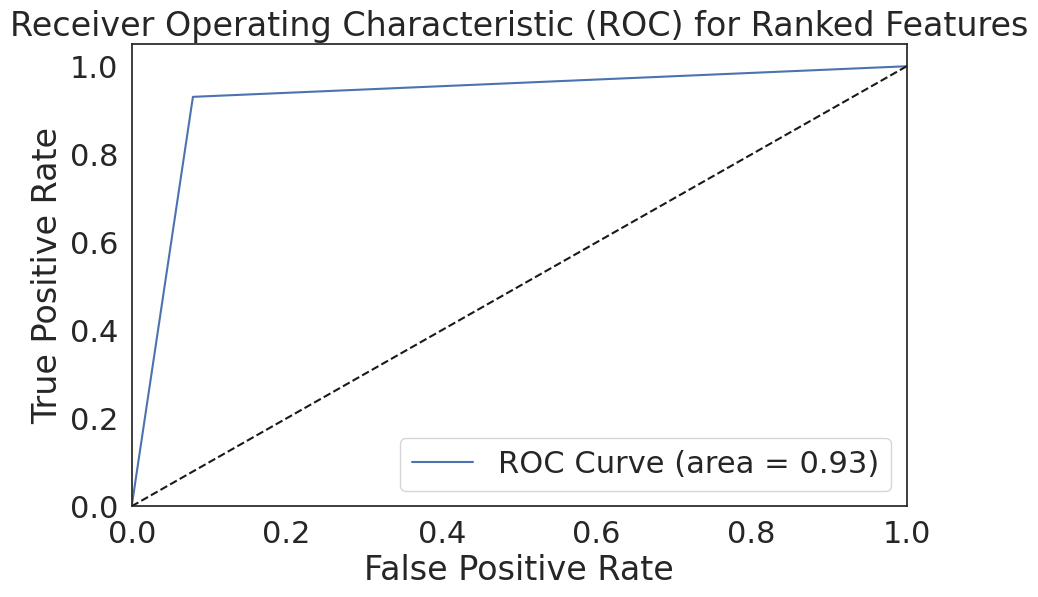

In [ ]:
# Plot ROC Curve for ranked features
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Ranked Features')
plt.legend(loc='lower right')
plt.show()

# **Desicion Tree**

In [ ]:
# importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# load dataset
creditdata_df = pd.read_csv("/content/creditcard.csv")
print(f"Dataset Shape :-")
print (creditdata_df.shape)

Dataset Shape :-
(284807, 31)


In [ ]:
#view data
creditdata_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
# Check for data based on Class column value which indicates
# 1 => False & 0 => True
false = creditdata_df[creditdata_df['Class']==1]
true = creditdata_df[creditdata_df['Class']==0]
n=len(false)/float(len(true))
print (n)
print('False Detection : {}'.format(len(creditdata_df[creditdata_df['Class']==1])))
print('True Detection:{}'.format(len(creditdata_df[creditdata_df['Class']==0])),"\n")

0.0017304750013189597
False Detection : 492
True Detection:284315 



In [ ]:
#False Datection Transaction
print("False Detection Transaction")
print("============================")
print(false.Amount.describe(),"\n")

#True Detection Transaction
print("True Detection Transaction")
print("============================")
print(true.Amount.describe(),"\n")

False Detection Transaction
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64 

True Detection Transaction
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64 



In [ ]:
X = creditdata_df.drop('Class', axis=1)
y = creditdata_df['Class']

Split data into training and testing sets:




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create a Decision Tree classifier:

In [ ]:
classifier = DecisionTreeClassifier()

Now let us train the classifier:

In [ ]:
import pandas as pd

# Option 1: Remove rows with NaN in 'y_train'
# This will drop the rows from both X_train and y_train where y_train has NaN values
X_train = X_train[y_train.notna()]
y_train = y_train[y_train.notna()]

# Option 2: Impute missing values with the mean, median, or a constant
# This will replace NaN values in y_train with the chosen value
# For example, to impute with the mean:
y_train = y_train.fillna(y_train.mean())

# Option 3: If y is categorical, you can impute with the most frequent value
# y_train = y_train.fillna(y_train.mode()[0])

# After handling missing values, you can fit the model
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
import numpy as np

# Reset the index of y_test to be numerical and sequential
y_test = y_test.reset_index(drop=True)

# Get indices of rows where y_test is not NaN
non_nan_indices = np.where(np.isfinite(y_test))[0]

# Filter both y_test and X_test to keep only valid rows
y_test = y_test[non_nan_indices]
X_test = X_test.iloc[non_nan_indices] # Use iloc for integer-location based indexing on X_test

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# ... (your previous code for model training and initial prediction) ...

# Reset the index of y_test to be numerical and sequential
y_test = y_test.reset_index(drop=True)

# Get indices of rows where y_test is not NaN
non_nan_indices = np.where(np.isfinite(y_test))[0]

# Filter both y_test and X_test to keep only valid rows
y_test = y_test[non_nan_indices]
X_test = X_test.iloc[non_nan_indices] # Use iloc for integer-location based indexing on X_test

# Regenerate y_pred using the filtered X_test
y_pred = classifier.predict(X_test) # This is the crucial line to add


accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 99.91222218320986
Confusion Matrix:
[[56832    32]
 [   18    80]]


In [ ]:
#Precision
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision=precision_score(y_test, y_pred, pos_label=1)*100
print('\n Score Precision :\n',precision )

#Recall
# Recall = TP / (TP + FN)
recall=recall_score(y_test, y_pred, pos_label=1)*100
print("\n Recall Score :\n", recall)

fscore=f1_score(y_test, y_pred, pos_label=1)*100
print("\n F1 Score :\n", fscore)


 Score Precision :
 71.42857142857143

 Recall Score :
 81.63265306122449

 F1 Score :
 76.19047619047619


AUC: 0.9078818922053908


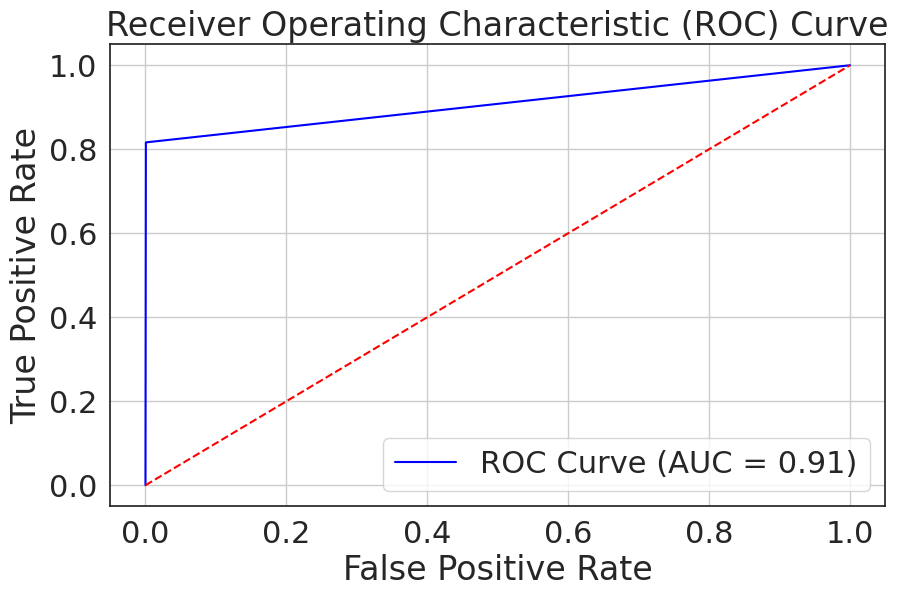

In [ ]:
# Import necessary functions
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the positive class
y_prob = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# **Isolation Forest**

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import os # accessing directory structure
import sklearn
import scipy
import matplotlib.pyplot as plt # plotting
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal","Fraud"]

In [ ]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info


<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]>

In [ ]:
data.isnull().values.any()

False

<ipython-input-7-555287af7267>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort=True) # Count the occurrences of each class


Text(0, 0.5, 'Frequency')

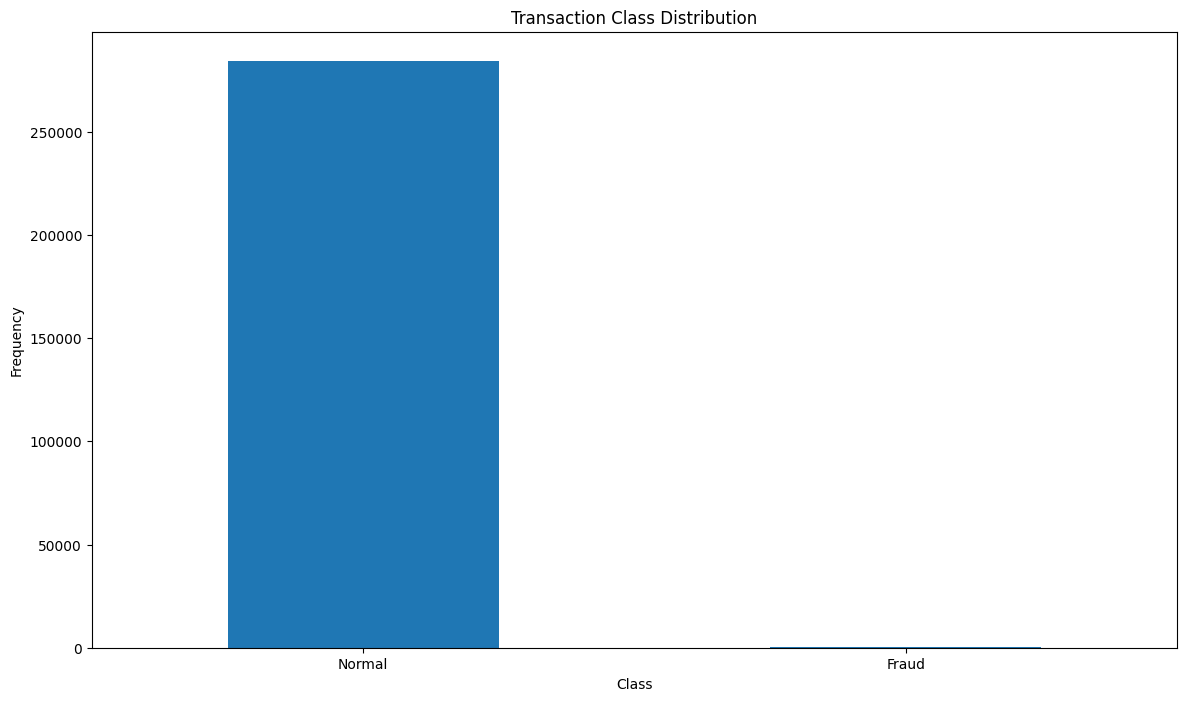

In [ ]:
count_classes = pd.value_counts(data['Class'], sort=True) # Count the occurrences of each class
count_classes.plot(kind='bar', rot=0) # Plot the class distribution
# Add labels and title to the plot
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
## Get the Fraud and the Normal dataset

Fraud = data[data['Class']==1]
Normal = data[data['Class']==0]

In [ ]:
print (Fraud.shape, Normal.shape)

(492, 31) (284315, 31)


In [ ]:
## we need to analyze more amount of information from the transaction data
# how different are the amount of money used in different transaction classes?
Fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
Normal.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


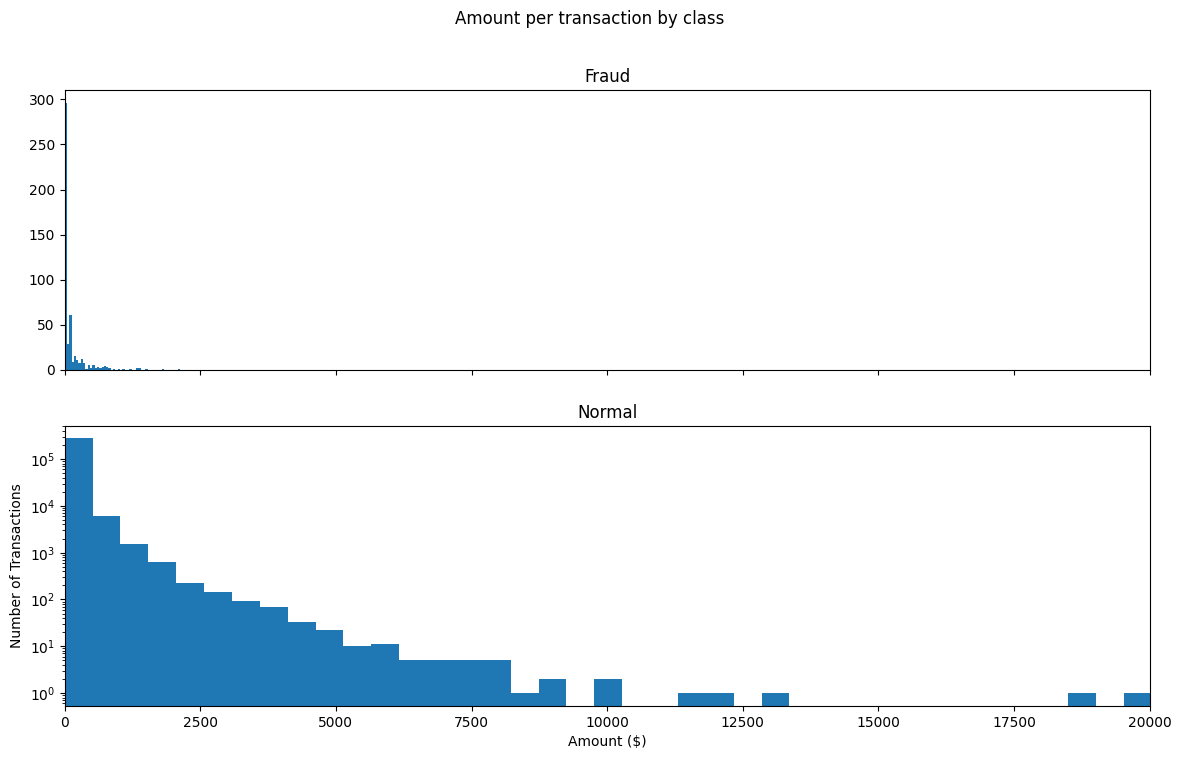

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins=bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()


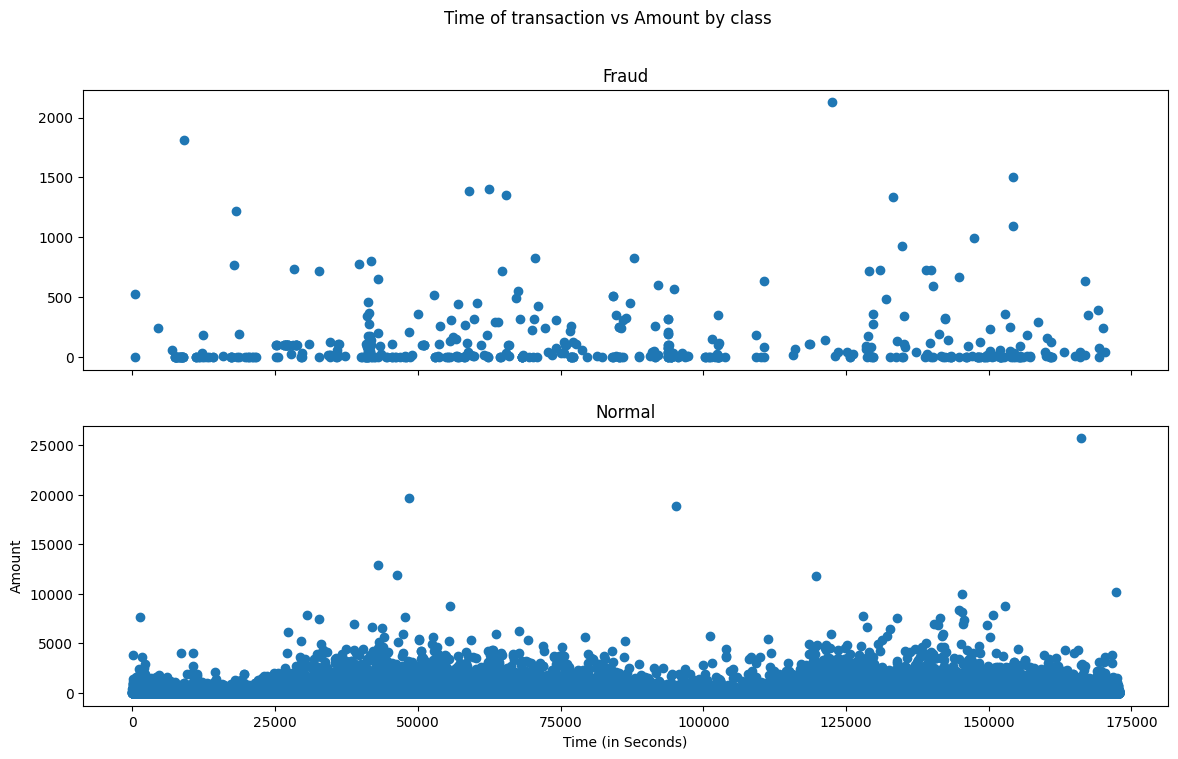

In [ ]:
# We will check if fraudulent transactions occur more often during a certain time frame.
# Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


In [ ]:
data1 = data.sample(frac=0.1, random_state=1)
data1.shape

(28481, 31)

In [ ]:
data.shape

(284807, 31)

In [ ]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


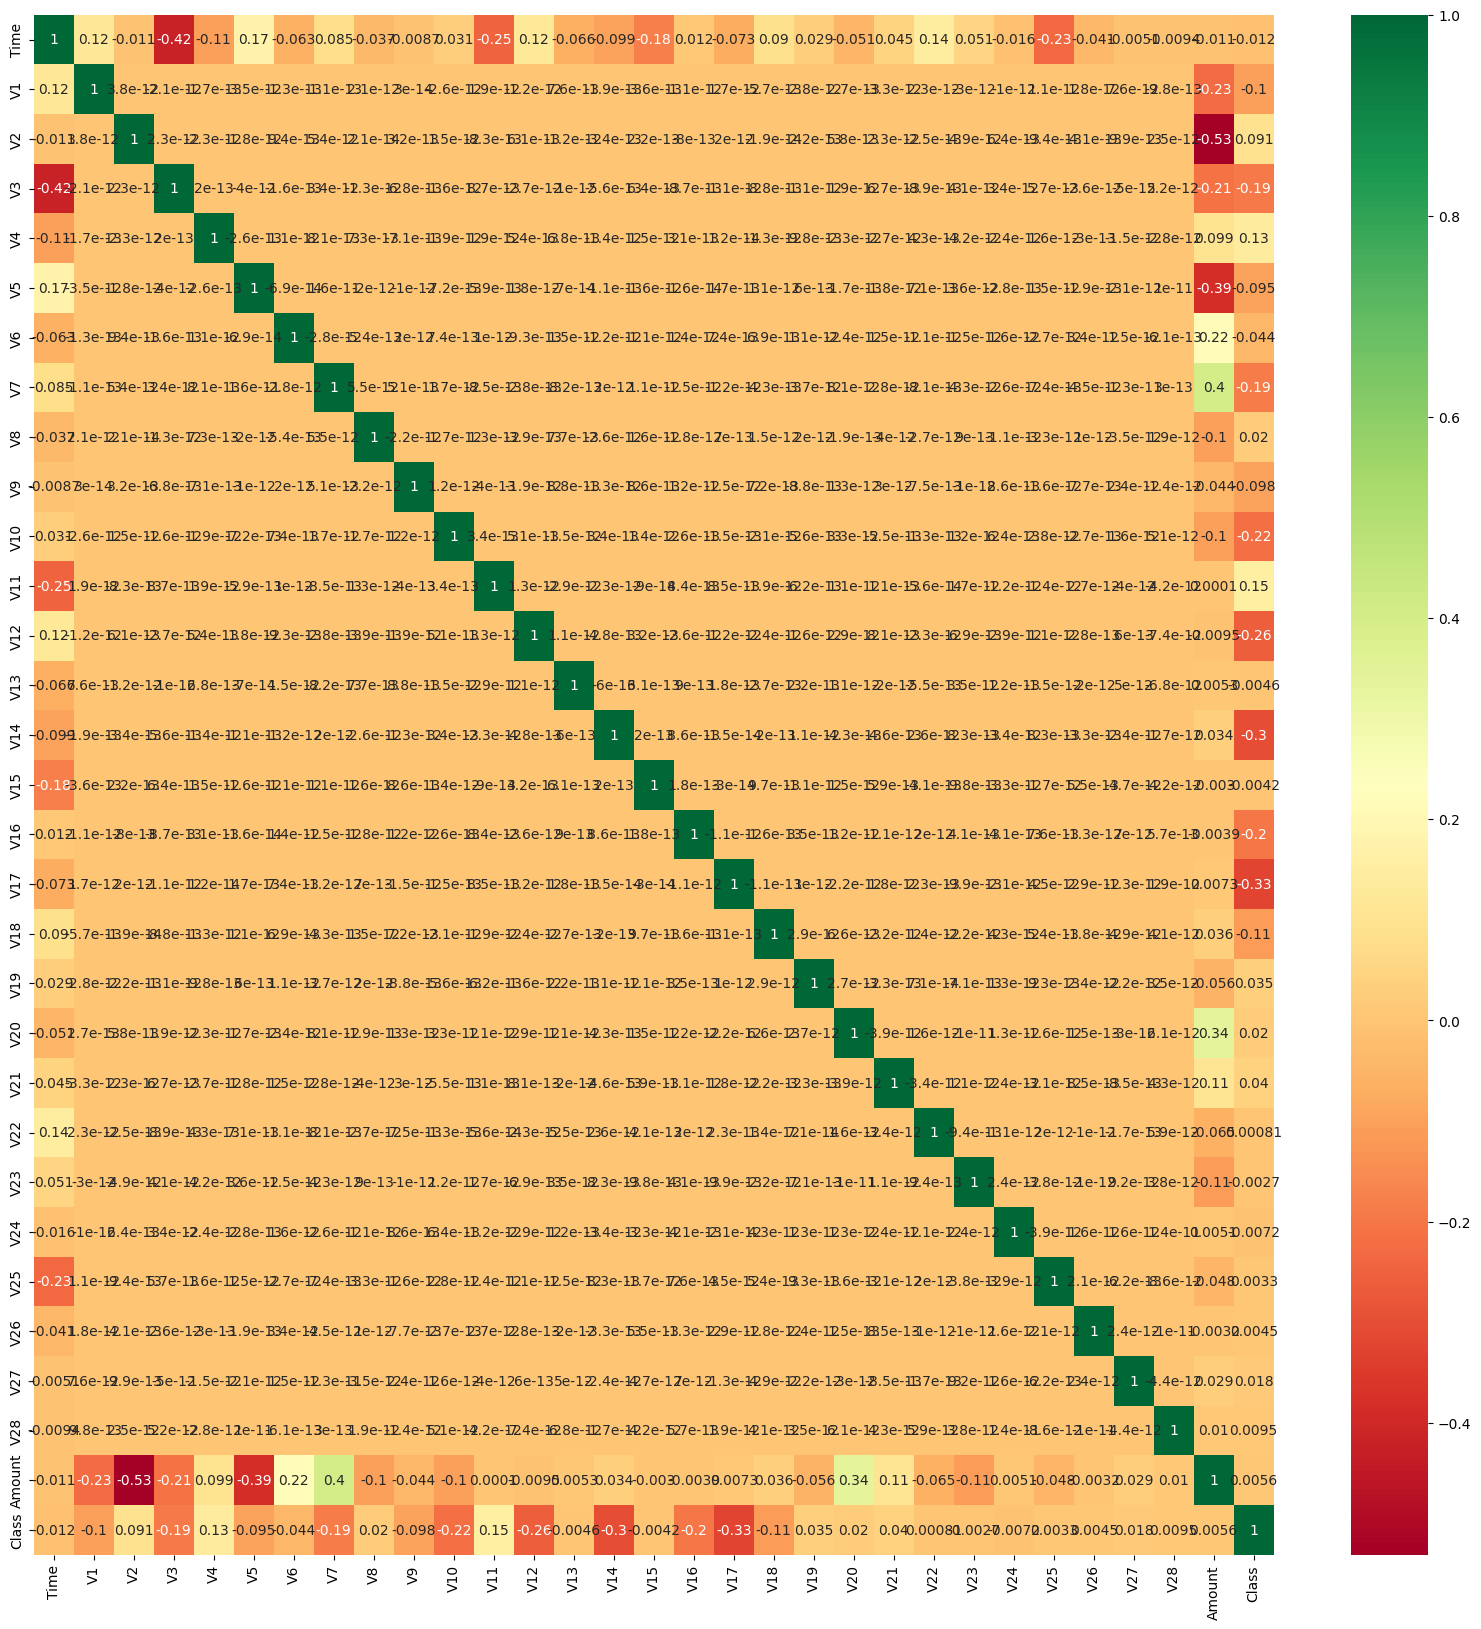

In [ ]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


Model Prediction

In [ ]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,
                                         max_iter=-1) # Removed random_state argument

}

In [ ]:
##Define the outlier detection methods
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,
                                         max_iter=-1) # Removed random_state argument

}

In [ ]:
##Define the outlier detection methods
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Assuming outlier_fraction is currently 0.0, change it to a value within the acceptable range
outlier_fraction = 0.1  # For example, 10% of the data is expected to be outliers

classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05,
                                         max_iter=-1)  # Removed random_state argument

}

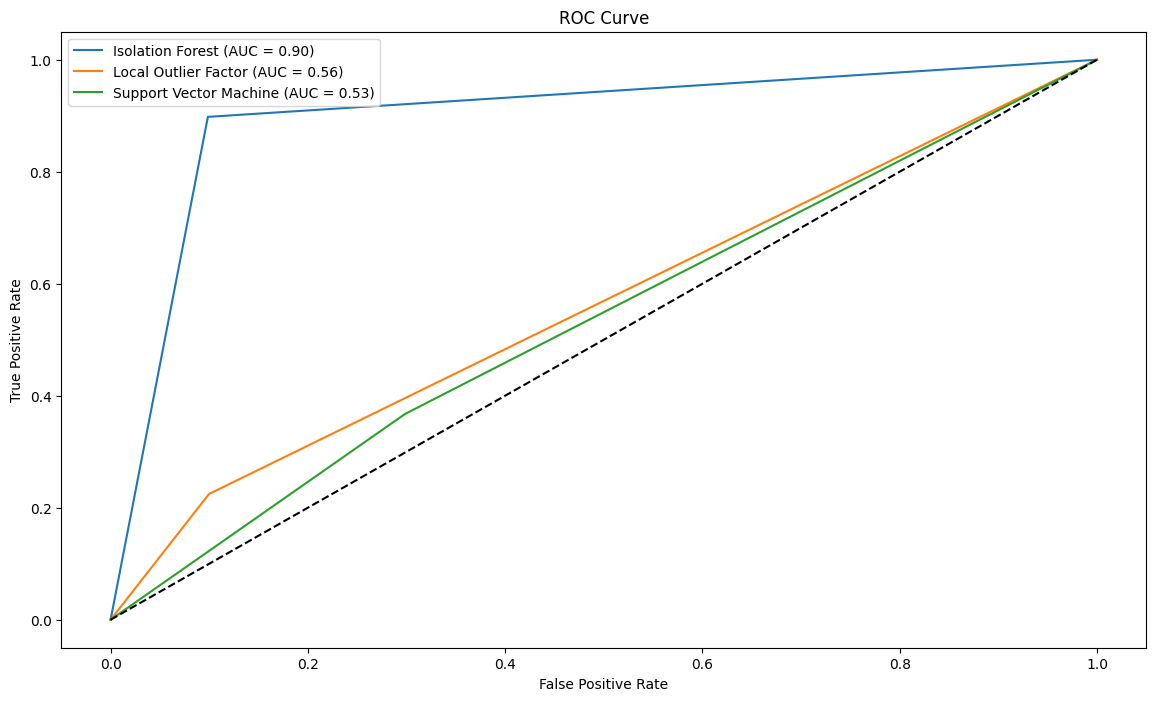


Isolation Forest Results:
Accuracy: 0.90
Precision: 0.02
Sensitivity (Recall): 0.90
Specificity: 0.90
F1 Score: 0.03
AUC: 0.90

Local Outlier Factor Results:
Accuracy: 0.90
Precision: 0.00
Sensitivity (Recall): 0.22
Specificity: 0.90
F1 Score: 0.01
AUC: 0.56

Support Vector Machine Results:
Accuracy: 0.70
Precision: 0.00
Sensitivity (Recall): 0.37
Specificity: 0.70
F1 Score: 0.00
AUC: 0.53


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Dictionary to store results
results = {}

# Loop through each classifier
for clf_name, clf in classifiers.items():
    if clf_name == "Local Outlier Factor":
        # Fit the model and predict outliers (-1 for outliers, 1 for inliers)
        y_pred = clf.fit_predict(X)
        # Invert predictions for consistency (Fraud=1, Normal=0)
        y_pred = [1 if x == -1 else 0 for x in y_pred]
    else:
        # Fit the model and predict outliers
        clf.fit(X)
        y_pred = clf.predict(X)
        # Invert predictions for consistency (Fraud=1, Normal=0)
        y_pred = [1 if x == -1 else 0 for x in y_pred]

    # Calculate evaluation metrics
    accuracy = accuracy_score(Y, y_pred)
    precision = precision_score(Y, y_pred)
    recall = recall_score(Y, y_pred)  # Sensitivity
    f1 = f1_score(Y, y_pred)
    tn, fp, fn, tp = confusion_matrix(Y, y_pred).ravel()
    specificity = tn / (tn + fp)
    auc = roc_auc_score(Y, y_pred)

    # Store results for each classifier
    results[clf_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Sensitivity (Recall)": recall,
        "Specificity": specificity,
        "F1 Score": f1,
        "AUC": auc
    }

    # ROC curve
    fpr, tpr, _ = roc_curve(Y, y_pred)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {auc:.2f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print results
for clf_name, metrics in results.items():
    print(f"\n{clf_name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
